In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import torch
import torch.nn as nn
import torch.nn.functional as F
#from torchvision import datasets, transforms
#from complexPyTorch.complexLayers import ComplexBatchNorm2d, ComplexConv2d, ComplexLinear
#from complexPyTorch.complexLayers import ComplexDropout2d, NaiveComplexBatchNorm2d
#from complexPyTorch.complexLayers import ComplexBatchNorm1d
#from complexPyTorch.complexFunctions import complex_relu, complex_max_pool2d

#non complex model
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from scipy.signal import find_peaks, peak_widths

import cvnn.layers as complex_layers

In [2]:
data = pd.read_csv('C:/Users/alamg/Desktop/Thesis_ML/graphene/data_absorbance.csv')
data_np= np.array(data)
data_500 = pd.read_csv('C:/Users/alamg/Desktop/Thesis_ML/graphene/data_500.csv')

In [3]:
data_500_np = np.array(data_500)

In [4]:
len(data_500)

25000

In [5]:
data_abs=[]
data_s11=[]
data_param=[]
flag=0
#reshaping the data for better usebility
for j in range(0,25000,50):
    row=[]
    row2=[]
    value3= data_500_np[flag,0:3]
    data_param.append(value3)
    for i in range(0,50,1):
        value = data_500_np[flag,5]
        value2= data_500_np[flag,4]
        row.append(value)
        row2.append(value2)
        flag=flag+1
    data_abs.append(row)
    data_s11.append(row2)
   

In [98]:
data_s11=np.array(data_s11,dtype='complex64')
data_abs=np.array(data_abs,dtype='float64')
data_param=np.array(data_param,dtype='float32')

In [7]:
data_abs.

(500, 50)

In [8]:
x_freq = np.linspace(0,5,50)

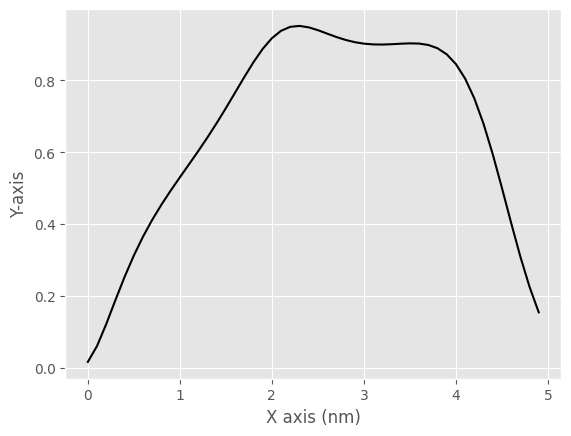

In [9]:
w1=np.arange(0,5,0.1) #plaotting original data for verification
with plt.style.context('ggplot'): #sanity check if correct waveforms are loaded
    plt.plot(w1,data_abs[66,:],label='complex', color='black')
  #  plt.plot(w1,data_abs[0,:],label='complex', color='blue')
   #plt.plot(w1,Y[1,:], label='absorbance')
#  plt.plot(w1,Y[2,:], color='green')
 #   plt.plot(w1,Y[3,:], color='blue')
  #  plt.plot(w1,Y[4,:], color='red')
    #plt.plot(w3,y_2p_wav[1,:])
    plt.xlabel("X axis (nm)")
    plt.ylabel("Y-axis")
    plt.show()
   # plt.legend()

In [90]:
data_pk=[]
data_am=[]
data_qf=[]
pos=[]
d_m=[]
d_m2=[]

In [91]:
#getting peaks and saving discarded points
for i in range(len(data_abs)):
    peaks, _ = find_peaks(data_abs[i,:],height=0.6)
    if len(peaks)==1:
        data_pk.append(peaks)
        data_am.append(data_abs[i,(peaks)])
        j = peak_widths(data_abs[i,:], peaks, rel_height=0.5)
        data_qf.append(j[0])
        pos.append(i)
    elif len(peaks)==2:
        data_pk.append(peaks)
        data_am.append(data_abs[i,(peaks)])
        j = peak_widths(data_abs[i,:], peaks, rel_height=0.5)
        data_qf.append(j[0])
        pos.append(i)
        d_m2.append(i)
    else:
        d_m.append(i)
        

[[array([33.10130343]),
  array([29.54881949]),
  array([32.28194505]),
  array([27.27170798]),
  array([30.45010388]),
  array([25.64912696]),
  array([27.61706275]),
  array([27.55219536]),
  array([31.86667858]),
  array([30.17603481]),
  array([27.76204198]),
  array([29.10516283]),
  array([29.91307987]),
  array([30.37112352]),
  array([31.73936086]),
  array([29.96926594]),
  array([27.0576577]),
  array([28.9806594]),
  array([25.7679184]),
  array([30.43358287]),
  array([29.70461243]),
  array([29.00269679]),
  array([30.31664874]),
  array([31.8625396]),
  array([30.47794718]),
  array([28.89631238]),
  array([29.92047439]),
  array([29.72179989]),
  array([30.72815765]),
  array([31.54303241]),
  array([30.68248609]),
  array([28.11464467]),
  array([26.90989706]),
  array([28.93878859]),
  array([29.49344638]),
  array([29.43680499]),
  array([29.38719427]),
  array([30.01648308]),
  array([25.52204823]),
  array([31.74287286]),
  array([25.58130886]),
  array([28.94724985

In [14]:
discard_data = pd.DataFrame()
#getting data for each peak response by taking X as different pos values for each 1,2,3 peak response
for i in range(0,len(d_m)):
    j = d_m[i]
    k = pd.DataFrame({"B":data_param[j,0],"W":data_param[j,1],"Ef":data_param[j,2]},index=[i])
    discard_data = pd.concat([discard_data, pd.DataFrame(k)], ignore_index=True)

In [15]:
x_data = pd.DataFrame()
#getting data for each peak response by taking X as different pos values for each 1,2,3 peak response
for i in range(0,len(pos)):
    j = pos[i]
    k = pd.DataFrame({"B":data_param[j,0],"W":data_param[j,1],"Ef":data_param[j,2]},index=[i])
    x_data = pd.concat([x_data, pd.DataFrame(k)], ignore_index=True)


In [16]:
y_data = pd.DataFrame()
#getting data for each peak response by taking y as different pos values for each 1,2,3 peak response
for i in range(0,len(pos)):
    m = pd.DataFrame({"Peak":data_pk[i][0],"Amp":data_am[i][0],"Q-Factor":(data_pk[i][0]/data_qf[i][0])},index=[i])
    y_data = pd.concat([y_data, pd.DataFrame(m)], ignore_index=True)

In [106]:
y_data_abs = []
#getting data for each peak response by taking y as different pos values for each 1,2,3 peak response
for i in range(0,len(pos)):
    j=pos[i]
    y_data_abs.append(data_abs[i,:])

In [17]:
discard_data=np.array(discard_data)

In [108]:
y_data=np.array(y_data)
x_data=np.array(x_data)
y_data_abs = np.array(y_data_abs)

In [109]:
y_data_abs.shape

(341, 50)

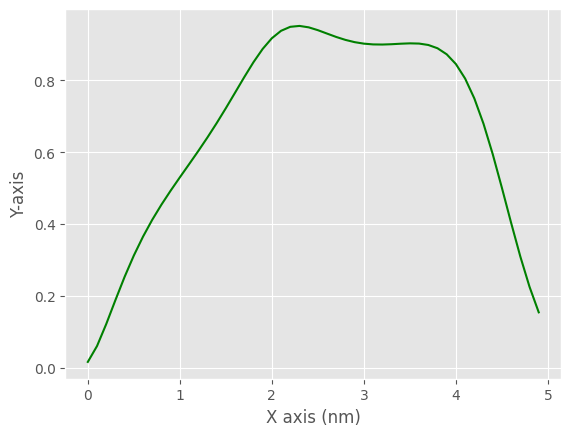

In [95]:
w1=np.arange(0,5,0.1) #plaotting original data for verification
with plt.style.context('ggplot'): #sanity check if correct waveforms are loaded
    plt.plot(w1,data_abs[66].T, color='green')
  #  plt.plot(w1,data_abs[0,:],label='complex', color='blue')
   #plt.plot(w1,Y[1,:], label='absorbance')
#  plt.plot(w1,Y[2,:], color='green')
 #   plt.plot(w1,Y[3,:], color='blue')
  #  plt.plot(w1,Y[4,:], color='red')
    #plt.plot(w3,y_2p_wav[1,:])
    plt.xlabel("X axis (nm)")
    plt.ylabel("Y-axis")
    plt.show()
   # plt.legend()

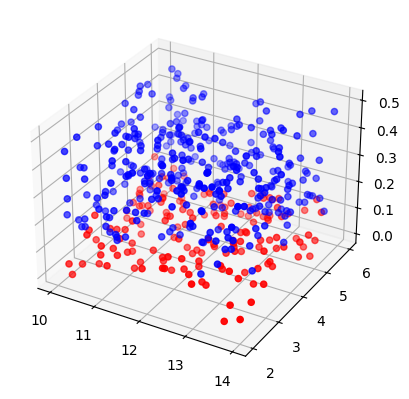

In [70]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x_data[:,1],x_data[:,0],x_data[:,2],color='blue')
ax.scatter(discard_data[:,1],discard_data[:,0],discard_data[:,2], color ='red')
plt.show()

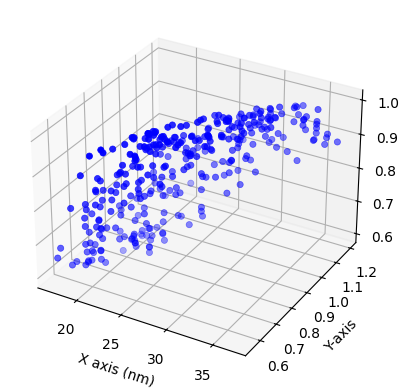

In [22]:
w2=np.arange(0,341,1) #
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
with plt.style.context('ggplot'): #sanity check if correct waveforms are loaded
    ax.scatter(y_data[:,0],y_data[:,2],y_data[:,1],color='blue')
  #  plt.plot(w1,data_abs[0,:],label='complex', color='blue')
   #plt.plot(w1,Y[1,:], label='absorbance')
#  plt.plot(w1,Y[2,:], color='green')
 #   plt.plot(w1,Y[3,:], color='blue')
  #  plt.plot(w1,Y[4,:], color='red')
    #plt.plot(w3,y_2p_wav[1,:])
    plt.xlabel("X axis (nm)")
    plt.ylabel("Y-axis")
    plt.show()
   # plt.legend()

In [ ]:

# Assuming X and Y are your feature and target matrices respectively
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.2, random_state=42)


# Now X_test contains the testing data
# You can use this X_test to evaluate your trained model

# Create a Sequential model
model = Sequential()

# Add the input layer and the first hidden layer
model.add(Dense(30, input_shape=(3,), activation='relu'))  # Assuming 64 neurons in the first hidden layer

# Add additional hidden layers if needed
model.add(Dense(30, activation='relu'))  # Example of adding another hidden layer

# Add additional hidden layers if needed
#model.add(Dense(64, activation='relu'))  # Example of adding another hidden layer

# Add additional hidden layers if needed
#model.add(Dense(30, activation='relu'))  # Example of adding another hidden layer

# Add additional hidden layers if needed
model.add(Dense(30, activation='relu'))  # Example of adding another hidden layer

# Add the output layer
model.add(Dense(3, activation='linear'))  # Assuming 5 design parameters, using linear activation

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Using mean squared error as the loss function

# Print a summary of the model
model.summary()

# Train the model
  # Replace X_train and Y_train with your actual training dat

# Make predictions
predictions = model.predict(X_test)  # Replace X_test with your actual test data

plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 30)                120       
                                                                 
 dense_71 (Dense)            (None, 30)                930       
                                                                 
 dense_72 (Dense)            (None, 30)                930       
                                                                 
 dense_73 (Dense)            (None, 3)                 93        
                                                                 
Total params: 2073 (8.10 KB)
Trainable params: 2073 (8.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/2000
9/9 [==============================] - 1s 4ms/step - loss: 233.1358
Epoch 2/2000
9/9 [==============================] - 0s 3ms/step - loss: 

In [ ]:
history = model.fit(X_train, y_train, epochs=2000, batch_size=32)

In [134]:
# %% [markdown]
# 
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# %%

# %%
x= x_data
y = y_data_abs

# Load CSV files


# Extract input and output data

#print(f"input data:{X}, output data: {y}")

# Normalize/Standardize input data
scaler = StandardScaler()
X = scaler.fit_transform(x)
#print(f"input data after fit transform(mean and standard deviation -> scale and center): {X}")

# Convert to PyTorch tensors

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Define the neural network
class MyNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(MyNeuralNetwork, self).__init__()
        self.input_size = input_size
        self.hidden_layers = nn.ModuleList([
            nn.Linear(input_size, hidden_sizes[0]),
            nn.GELU()
        ])
        for i in range(1, len(hidden_sizes)):
            self.hidden_layers.extend([
                nn.Linear(hidden_sizes[i - 1], hidden_sizes[i]),
                nn.GELU()
            ])
        self.output_layer = nn.Linear(hidden_sizes[-1], output_size)

    def forward(self, x):
        for layer in self.hidden_layers:
            x = layer(x)
        x = self.output_layer(x)
        return x

# Define the input, hidden, and output sizes
input_size = X.shape[1]
hidden_sizes = [64, 248, 248, 64]  # Adjust the number of neurons and layers as needed
output_size = y.shape[1]

# Create an instance of the neural network
model = MyNeuralNetwork(input_size, hidden_sizes, output_size)
print(model)
# Define loss function and optimizer
criterion = nn.MSELoss() # Mean Squared Error Loss
optimizer = optim.Adam(model.parameters(), lr=0.001) # Adaptive Moment Estimation

# Training loop
num_epochs = 10000

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], MSE: {loss.item():.4f}')


# %%
# Set the model to evaluation mode
model.eval()

# Make predictions on new data
with torch.no_grad():
    new_data = X_test.clone().detach().requires_grad_(True)
    test_predictions  = model(new_data)

# Convert predictions to numpy array if needed
predictions_np = test_predictions.numpy()

# Evaluate the model on the test set
test_loss = criterion(test_predictions, y_test)
print(f'Test MSE: {test_loss.item():.4f}')

# %%





MyNeuralNetwork(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=3, out_features=64, bias=True)
    (1): GELU(approximate='none')
    (2): Linear(in_features=64, out_features=248, bias=True)
    (3): GELU(approximate='none')
    (4): Linear(in_features=248, out_features=248, bias=True)
    (5): GELU(approximate='none')
    (6): Linear(in_features=248, out_features=64, bias=True)
    (7): GELU(approximate='none')
  )
  (output_layer): Linear(in_features=64, out_features=50, bias=True)
)
Epoch [100/10000], MSE: 0.0372
Epoch [200/10000], MSE: 0.0358
Epoch [300/10000], MSE: 0.0336
Epoch [400/10000], MSE: 0.0299
Epoch [500/10000], MSE: 0.0278
Epoch [600/10000], MSE: 0.0258
Epoch [700/10000], MSE: 0.0248
Epoch [800/10000], MSE: 0.0200
Epoch [900/10000], MSE: 0.0176
Epoch [1000/10000], MSE: 0.0155
Epoch [1100/10000], MSE: 0.0139
Epoch [1200/10000], MSE: 0.0153
Epoch [1300/10000], MSE: 0.0108
Epoch [1400/10000], MSE: 0.0083
Epoch [1500/10000], MSE: 0.0069
Epoch [1600/10000], MSE: 0.

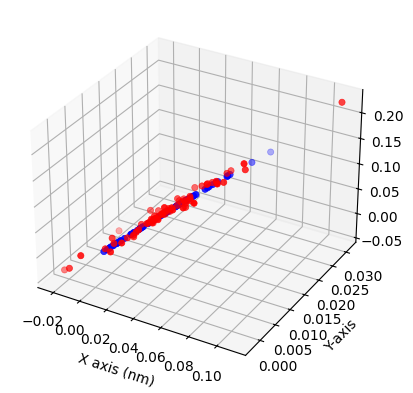

In [111]:
w2=np.arange(0,341,1) #
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
with plt.style.context('ggplot'): #sanity check if correct waveforms are loaded
    ax.scatter(y_test[:,1],y_test[:,0],y_test[:,2],color='blue')
    ax.scatter(predictions_np[:,1],predictions_np[:,0],predictions_np[:,2], color='red')
  #  plt.plot(w1,data_abs[0,:],label='complex', color='blue')
   #plt.plot(w1,Y[1,:], label='absorbance')
#  plt.plot(w1,Y[2,:], color='green')
 #   plt.plot(w1,Y[3,:], color='blue')
  #  plt.plot(w1,Y[4,:], color='red')
    #plt.plot(w3,y_2p_wav[1,:])
    plt.xlabel("X axis (nm)")
    plt.ylabel("Y-axis")
    plt.show()
   # plt.legend()

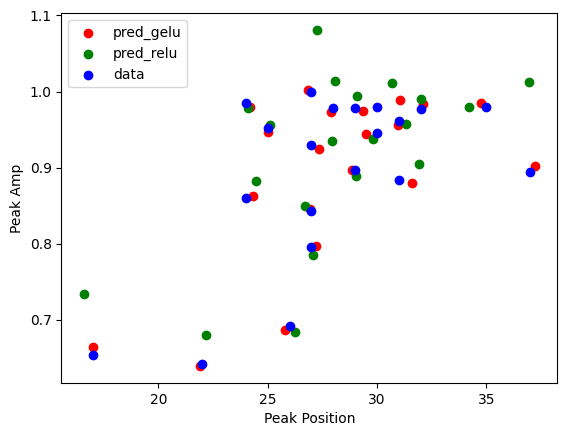

In [78]:
w1=np.arange(0,10,1)
plt.scatter(predictions_np[0:20,0],predictions_np[0:20,1],label="pred_gelu", color="red")
plt.scatter(predictions[0:20,0],predictions[0:20,1],label="pred_relu", color="green")
plt.scatter(y_test[0:20,0],y_test[0:20,1],label="data",color="blue")
   # plt.plot(w1,Y[2,:], color='green')
    #plt.plot(w1,Y[3,:], color='blue')
    #plt.plot(w1,Y[4,:], color='red')
    #plt.plot(w3,y_2p_wav[1,:])
plt.xlabel("Peak Position")
plt.ylabel("Peak Amp")
plt.legend(loc="upper left")
plt.show()


In [124]:
y_test.shape

torch.Size([69, 50])

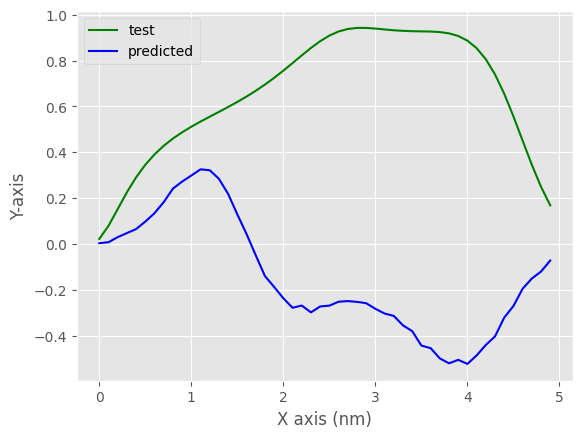

In [138]:
w1=np.arange(0,5,0.1) #plaotting original data for verification
with plt.style.context('ggplot'): #sanity check if correct waveforms are loaded
    plt.plot(w1,y_test[10,:].T, color='green', label='test')
    plt.plot(w1,predictions_np[10,:].T,label='predicted', color='blue')
   #plt.plot(w1,Y[1,:], label='absorbance')
#  plt.plot(w1,Y[2,:], color='green')
 #   plt.plot(w1,Y[3,:], color='blue')
  #  plt.plot(w1,Y[4,:], color='red')
    #plt.plot(w3,y_2p_wav[1,:])
    plt.xlabel("X axis (nm)")
    plt.ylabel("Y-axis")
    plt.legend()
    plt.show()
